In [15]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [111]:
gcolors = ['mediumseagreen', 'powderblue', 'lightcoral', 'lightpink', 'goldenrod']
ticks_font = 14
axis_font = 16
title_font = 18
xwid = 8
ywid = 5

def make_bar_plot(title, xtitle, ytitle, index, height, labels): 
    plt.figure(figsize=(xwid, ywid))
    plt.bar(x=index,height=height,tick_label=labels, color = gcolors) 
    plt.title(title, fontsize=title_font)
    plt.xlabel(xtitle, fontsize=axis_font)
    plt.xticks(fontsize=ticks_font)
    plt.yticks(fontsize=ticks_font)
    plt.ylabel(ytitle, fontsize=axis_font)
    plt.show()

In [86]:
base = pd.read_csv('mh_data.csv')
base.head()
base = base.drop(['Why or why not?', 'Why or why not?.1'], axis=1)
questions = base.columns
print(base.columns)


Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [87]:
columns = ['SelfEmployed', 'NumEmployees', 'PrimarilyTechEmployer', 'PrimaryRoleTech', 'EmployerMHBenefits', 'KnowMHBenefits', 'DiscussedMH', 'ResourcesMH', 'AnonymityProtected', 'MHMedicalLeave',  
            'MHEmployerConsq', 'PHEmployerConsq', 'DicussMHCowrk', 'DiscussMHSuper', 'MHSeriousAsPH', 'CowrkNegConsqMH', 'MedCvrgMH', 'KnowMHResources', 'RevealMHDtoClients', 
           'RevealedMHDtoClientsConsq', 'RevealedMHDtoCowrk', 'RevealedMHDtoCowrkConsq', 'ProductivityMH', 'TimeAffectedMH', 'HasPrevEmployers', 'PrevMHBenefits', 'PrevMHC', 
          'PrevDiscussedMH', 'PrevResourcesMH', 'PrevAnonymityProtected', 'PrevMHEmployerConsq', 'PrevPHEmployerConsq', 'PrevDiscussMHCowrk', 'PrevDiscussMHSuper', 
           'PrevMHSeriousAsPH', 'PrevCowrkNegConsqMH', 'PHInterview', 'MHInterview', 'MHIHurtCareer', 'CwrkNegViewYouMH', 'WillingShareFriendsMI', 'PrevBadHandledMHI',
           'OthersDiscussLessLikely', 'FamHistoryMI', 'PastMHD', 'CurrentMHD', 'YesWhichConditions', 'MaybeWhichConditions', 'MHDfromProf', 'FromProfWhichConditions', 
          'SoughtTreatment', 'MHIInterferesWork', 'MHNotInterferesWork', 'Age', 'Gender', 'Country', 'USState', 'Country1', 'USState1', 'WorkPosition', 'WorkRemotely'] 

In [88]:
display(base)
base.columns = columns
display(base)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


,SelfEmployed,NumEmployees,PrimarilyTechEmployer,PrimaryRoleTech,EmployerMHBenefits,KnowMHBenefits,DiscussedMH,ResourcesMH,AnonymityProtected,MHMedicalLeave,...,MHIInterferesWork,MHNotInterferesWork,Age,Gender,Country,USState,Country1,USState1,WorkPosition,WorkRemotely
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


Clean data to make more readable

In [89]:
base.SelfEmployed = base.SelfEmployed.replace([0,1], ['No', 'Yes'])
base.PrimarilyTechEmployer.value_counts()
base.PrimarilyTechEmployer = base.PrimarilyTechEmployer.replace([0.0, 1.0], ['No', 'Yes'])
base.PrimaryRoleTech = base.PrimaryRoleTech.replace([0.0, 1.0], ['No', 'Yes'])
base.MedCvrgMH = base.MedCvrgMH.replace([0.0, 1.0], ['No', 'Yes'])
base.HasPrevEmployers = base.HasPrevEmployers.replace([0,1], ['No', 'Yes'])
base.SoughtTreatment.value_counts()
base.SoughtTreatment = base.SoughtTreatment.replace([0,1], ['No', 'Yes'])
base.SoughtTreatment.value_counts()
base.Gender.value_counts()
base.Gender = base.Gender.str.lower().str.strip()
base.Gender = base.Gender.replace(dict.fromkeys(['m', 'man', 'cis male', 'male (cis)', 'male.', 'cis man', 'malr', 'dude', 'sex is male', 'mail', 'male (trans, ftm)', 
                                                 'male/genderqueer', 'm|', 'cisdude'], 'male'))
base.Gender = base.Gender.replace(dict.fromkeys(['woman', 'f', 'cis female', 'cisgender female', 'fm', 'fem', 'cis-woman', 'female assigned at birth', 'transgender woman', 
                                                'mtf', 'female-bodied; no feelings about gender', 'female (props for making this a freeform field, though)', 'female/woman',
                                                'i identify as female.', 'female or mulit-gender femme', 'genderqueer woman', 'transitioned, m2f', 'genderflux demi-girl'], 'female'))
# keep_list = ['male', 'female']
# acknowledge ethical concerns of removing participants outside of gender binary 
base = base[(base.Gender == 'male') | (base.Gender == 'female')]
base.Gender.value_counts()
base

,SelfEmployed,NumEmployees,PrimarilyTechEmployer,PrimaryRoleTech,EmployerMHBenefits,KnowMHBenefits,DiscussedMH,ResourcesMH,AnonymityProtected,MHMedicalLeave,...,MHIInterferesWork,MHNotInterferesWork,Age,Gender,Country,USState,Country1,USState1,WorkPosition,WorkRemotely
0,No,26-100,Yes,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,No,6-25,Yes,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,No,6-25,Yes,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,No,6-25,No,Yes,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,No,500-1000,Yes,NaN,Yes,No,No,No,Yes,Somewhat easy,...,Rarely,Often,38,female,United States of America,Illinois,United States of America,Illinois,Support,Always
1428,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,male,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,No,100-500,Yes,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes


Understand distribution of participants based on RQ and interested populations 

Partipicants from 53 countries 

5 countries with ~50+ participants 

United States most populous country, all countries have enough participants to test for significance 

1174


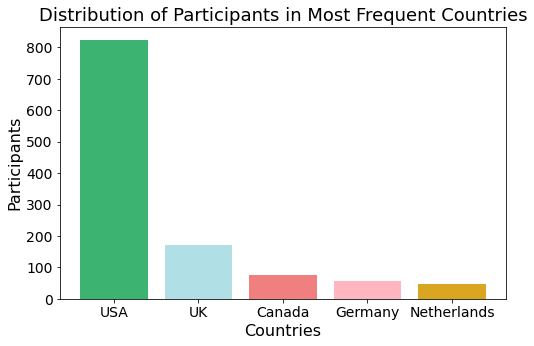

In [113]:
base.Country.value_counts()
len(base.Country.value_counts())
countries_list = base.Country.value_counts().nlargest(5).index.tolist()
countries_list
countries_abb = ['USA', 'UK', 'Canada', 'Germany', 'Netherlands']
print(len(base))
base = base[base.Country.isin(countries_list)]
len(base)
base.Country.value_counts()
countries_num = base.Country.value_counts().tolist()
countries_num
index = np.arange(len(countries_list))
colors = ['red', 'green', 'blue', 'orange', 'purple'] 
'''
plt.figure(figsize=(xwid, ywid))
plt.bar(x=index,height=countries_num,tick_label=countries_abb, color = gcolors) 
plt.title("Distribution of Participants in Most Frequent Countries", fontsize=title_font)
plt.xlabel("Countries", fontsize=axis_font)
plt.xticks(fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)
plt.ylabel("Participants", fontsize=axis_font)
defined into helper function 
'''
make_bar_plot("Distribution of Participants in Most Frequent Countries", "Countries", "Participants", index, countries_num, countries_abb)

Understand gender demographics

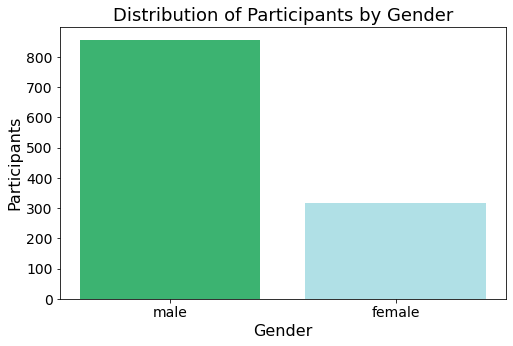

In [119]:
gender_num = base.Gender.value_counts()
gender_list = base.Gender.value_counts().index.tolist()
index = np.arange(len(gender_list))
make_bar_plot("Distribution of Participants by Gender", "Gender", "Participants", index, gender_num, gender_list)

In [120]:
base.Age.value_counts()

30     79
31     64
35     63
32     63
34     62
29     62
28     59
33     53
27     53
26     49
37     48
39     46
36     41
38     40
25     34
40     34
24     31
44     26
42     26
22     24
45     23
43     23
46     19
23     18
41     17
21     12
55     12
47     11
49     11
48      9
50      8
54      7
20      6
51      6
52      6
56      4
63      4
53      3
57      3
59      2
61      2
19      2
74      1
65      1
70      1
66      1
3       1
62      1
58      1
15      1
323     1
Name: Age, dtype: int64